In [1]:
import pandas as pd
import matplotlib.pyplot as plt

col_names = ['STD/Mean','Prop > 1STD','Prop > 2STD','Prop > 3STD','Prop > 4STD','Prop > 5STD','Prop > 6STD','IQR/STD',
            'Skew','Kurtosis','Rev CCF','2nd ACF','CSSD','Von Neumann Ratio','QPE?']
qpe_df = pd.read_csv('/Users/do19150/Gits/ML_QPE/Features/qpe_feats.csv',names = col_names)
no_qpe_df = pd.read_csv('/Users/do19150/Gits/ML_QPE/Features/no_qpe_feats.csv',names = col_names)

obs_df = pd.read_csv('/Users/do19150/Gits/ML_QPE/Features/realobs_test_data.csv',dtype='object')
obs_df = obs_df.astype({'STD/Mean':'float32','Prop > 1STD':'float32','Prop > 2STD':'float32','Prop > 3STD':'float32',
                        'Prop > 4STD':'float32','Prop > 5STD':'float32','Prop > 6STD':'float32',
                        'IQR/STD':'float32','Skew':'float32','Kurtosis':'float32','Rev CCF':'float32',
                        '2nd ACF':'float32','CSSD':'float32','Von Neumann Ratio':'float32','QPE?':'float32'})

In [2]:
obs_df[obs_df['QPE?']==1].describe()

,STD/Mean,Prop > 1STD,Prop > 2STD,Prop > 3STD,Prop > 4STD,Prop > 5STD,Prop > 6STD,IQR/STD,Skew,Kurtosis,Rev CCF,2nd ACF,CSSD,Von Neumann Ratio,QPE?
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0
mean,1.084214,0.130043,0.057355,0.029248,0.012046,0.001690,0.000141,0.711295,2.403179,6.799461,18.544474,0.276641,0.662090,0.472907,1.0
std,0.365915,0.064497,0.010731,0.012373,0.006906,0.001844,0.000507,0.338650,0.755789,3.213656,454.169891,0.212248,0.198945,0.492648,0.0
min,0.384363,0.071139,0.034832,0.008615,0.000000,0.000000,0.000000,0.371759,1.170957,0.524761,-1008.613647,0.011134,0.297882,0.059081,1.0
25%,0.996266,0.096518,0.052632,0.018875,0.010015,0.000000,0.000000,0.474696,1.613654,4.857980,-168.140991,0.098798,0.528541,0.165855,1.0
50%,1.138613,0.104848,0.060976,0.035201,0.011547,0.002105,0.000000,0.590493,2.771076,8.317466,-48.652508,0.181500,0.740284,0.235913,1.0
75%,1.368757,0.119929,0.065347,0.037715,0.014520,0.002311,0.000000,0.976671,2.881898,9.145258,61.513603,0.468963,0.825989,0.449688,1.0
max,1.654240,0.289340,0.068771,0.043378,0.024291,0.006645,0.001829,1.344517,3.180641,10.689617,845.016846,0.580927,0.896931,1.697975,1.0


In [3]:
obs_df[obs_df['QPE?']==0].describe()

,STD/Mean,Prop > 1STD,Prop > 2STD,Prop > 3STD,Prop > 4STD,Prop > 5STD,Prop > 6STD,IQR/STD,Skew,Kurtosis,Rev CCF,2nd ACF,CSSD,Von Neumann Ratio,QPE?
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0
mean,0.842541,0.274535,0.042842,0.008611,0.002451,0.000785,0.000409,1.286785,1.074349,2.791295,-8.753476,0.097204,0.337717,1.771253,0.0
std,0.621999,0.095357,0.021521,0.007598,0.005481,0.001905,0.001580,0.386792,1.030663,6.812713,95.299599,0.083242,0.164424,0.465828,0.0
min,0.194716,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.308539,-1.593663,-476.564880,-0.317698,0.000000,0.321832,0.0
25%,0.496617,0.205196,0.033637,0.003762,0.000000,0.000000,0.000000,1.151129,0.558877,0.205173,-28.060819,0.078264,0.261052,1.770669,0.0
50%,0.733920,0.299099,0.041610,0.007065,0.000586,0.000000,0.000000,1.346443,0.822703,0.683529,-5.891659,0.097568,0.293936,1.910780,0.0
75%,0.965099,0.324044,0.047540,0.011059,0.002939,0.000418,0.000000,1.445787,1.192055,1.815119,16.163442,0.134775,0.343825,2.002497,0.0
max,3.511204,0.470996,0.142857,0.038462,0.038462,0.009524,0.009524,1.929713,4.759692,35.132172,260.578308,0.227788,0.875000,2.423966,0.0


In [4]:
qpe_f1 = qpe_df['STD/Mean'].values
qpe_f2 = qpe_df['Prop > 1STD'].values
qpe_f3 = qpe_df['Prop > 2STD'].values
qpe_f4 = qpe_df['Prop > 3STD'].values
qpe_f5 = qpe_df['Prop > 4STD'].values
qpe_f6 = qpe_df['Prop > 5STD'].values
qpe_f7 = qpe_df['Prop > 6STD'].values
qpe_f8 = qpe_df['IQR/STD'].values
qpe_f9 = qpe_df['Skew'].values
qpe_f10 = qpe_df['Kurtosis'].values
qpe_f11 = qpe_df['Rev CCF'].values
qpe_f12 = qpe_df['2nd ACF'].values
qpe_f13 = qpe_df['CSSD'].values
qpe_f14 = qpe_df['Von Neumann Ratio'].values

In [5]:
nqpe_f1 = no_qpe_df['STD/Mean'].values
nqpe_f2 = no_qpe_df['Prop > 1STD'].values
nqpe_f3 = no_qpe_df['Prop > 2STD'].values
nqpe_f4 = no_qpe_df['Prop > 3STD'].values
nqpe_f5 = no_qpe_df['Prop > 4STD'].values
nqpe_f6 = no_qpe_df['Prop > 5STD'].values
nqpe_f7 = no_qpe_df['Prop > 6STD'].values
nqpe_f8 = no_qpe_df['IQR/STD'].values
nqpe_f9 = no_qpe_df['Skew'].values
nqpe_f10 = no_qpe_df['Kurtosis'].values
nqpe_f11 = no_qpe_df['Rev CCF'].values
nqpe_f12 = no_qpe_df['2nd ACF'].values
nqpe_f13 = no_qpe_df['CSSD'].values
nqpe_f14 = no_qpe_df['Von Neumann Ratio'].values

In [6]:
realq_f1 = obs_df[obs_df['QPE?']==1]['STD/Mean'].values
realq_f2 = obs_df[obs_df['QPE?']==1]['Prop > 1STD'].values
realq_f3 = obs_df[obs_df['QPE?']==1]['Prop > 2STD'].values
realq_f4 = obs_df[obs_df['QPE?']==1]['Prop > 3STD'].values
realq_f5 = obs_df[obs_df['QPE?']==1]['Prop > 4STD'].values
realq_f6 = obs_df[obs_df['QPE?']==1]['Prop > 5STD'].values
realq_f7 = obs_df[obs_df['QPE?']==1]['Prop > 6STD'].values
realq_f8 = obs_df[obs_df['QPE?']==1]['IQR/STD'].values
realq_f9 = obs_df[obs_df['QPE?']==1]['Skew'].values
realq_f10 = obs_df[obs_df['QPE?']==1]['Kurtosis'].values
realq_f11 = obs_df[obs_df['QPE?']==1]['Rev CCF'].values
realq_f12 = obs_df[obs_df['QPE?']==1]['2nd ACF'].values
realq_f13 = obs_df[obs_df['QPE?']==1]['CSSD'].values
realq_f14 = obs_df[obs_df['QPE?']==1]['Von Neumann Ratio'].values

In [7]:
realn_f1 = obs_df[obs_df['QPE?']==0]['STD/Mean'].values
realn_f2 = obs_df[obs_df['QPE?']==0]['Prop > 1STD'].values
realn_f3 = obs_df[obs_df['QPE?']==0]['Prop > 2STD'].values
realn_f4 = obs_df[obs_df['QPE?']==0]['Prop > 3STD'].values
realn_f5 = obs_df[obs_df['QPE?']==0]['Prop > 4STD'].values
realn_f6 = obs_df[obs_df['QPE?']==0]['Prop > 5STD'].values
realn_f7 = obs_df[obs_df['QPE?']==0]['Prop > 6STD'].values
realn_f8 = obs_df[obs_df['QPE?']==0]['IQR/STD'].values
realn_f9 = obs_df[obs_df['QPE?']==0]['Skew'].values
realn_f10 = obs_df[obs_df['QPE?']==0]['Kurtosis'].values
realn_f11 = obs_df[obs_df['QPE?']==0]['Rev CCF'].values
realn_f12 = obs_df[obs_df['QPE?']==0]['2nd ACF'].values
realn_f13 = obs_df[obs_df['QPE?']==0]['CSSD'].values
realn_f14 = obs_df[obs_df['QPE?']==0]['Von Neumann Ratio'].values

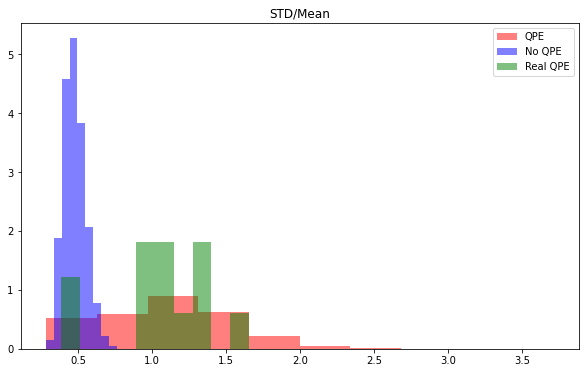

In [8]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f1,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f1,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realq_f1,density=True,alpha=0.5,label='Real QPE',color='g')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[0])
plt.show()

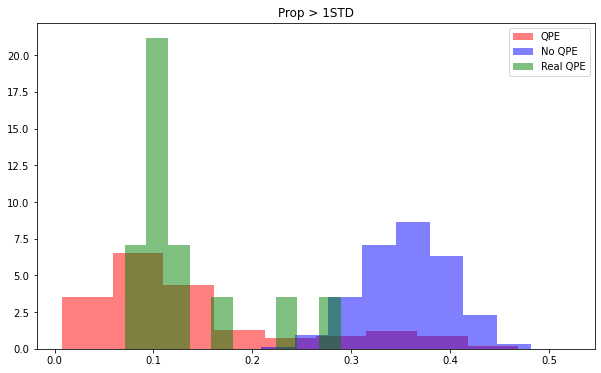

In [9]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f2,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f2,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realq_f2,density=True,alpha=0.5,label='Real QPE',color='g')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[1])
plt.show()

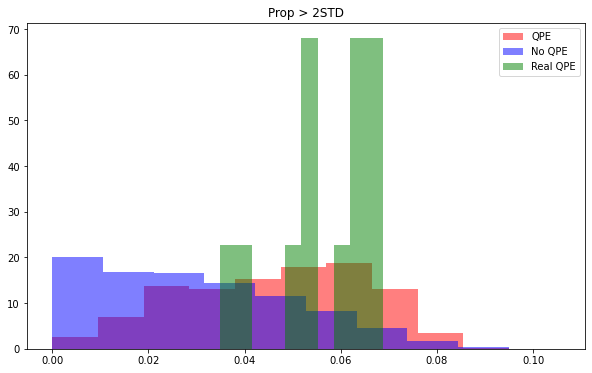

In [10]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f3,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f3,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realq_f3,density=True,alpha=0.5,label='Real QPE',color='g')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[2])
plt.show()

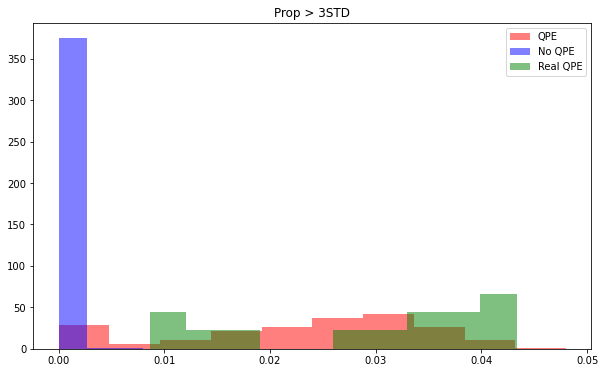

In [11]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f4,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f4,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realq_f4,density=True,alpha=0.5,label='Real QPE',color='g')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[3])
plt.show()

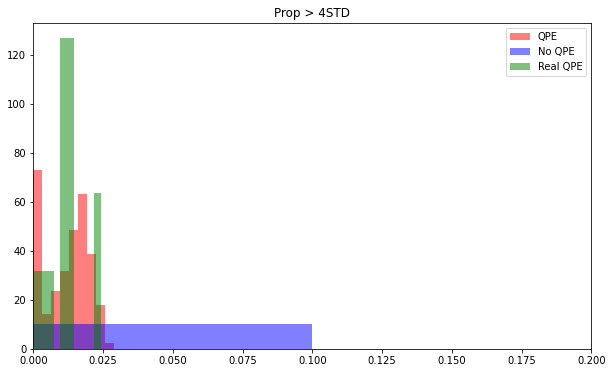

In [12]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f5,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f5,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realq_f5,density=True,alpha=0.5,label='Real QPE',color='g')
plt.xlim(0,0.2)
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[4])
plt.show()

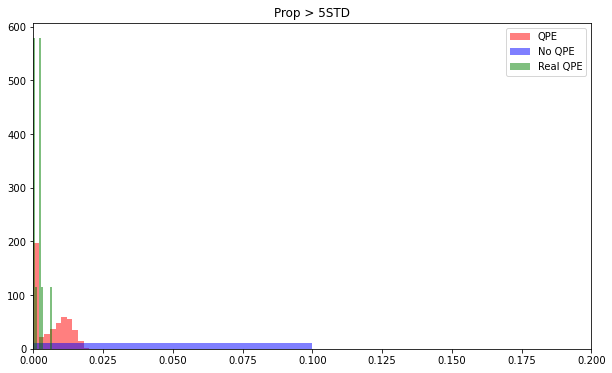

In [13]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f6,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f6,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realq_f6,density=True,alpha=0.5,label='Real QPE',color='g')
plt.legend(loc='upper right')
plt.xlim(0,0.2)
plt.title(qpe_df.columns.values[5])
plt.show()

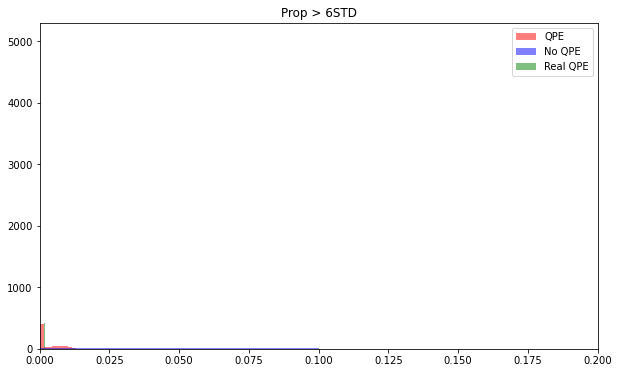

In [14]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f7,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f7,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realq_f7,density=True,alpha=0.5,label='Real QPE',color='g')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[6])
plt.xlim(0,0.2)
plt.show()

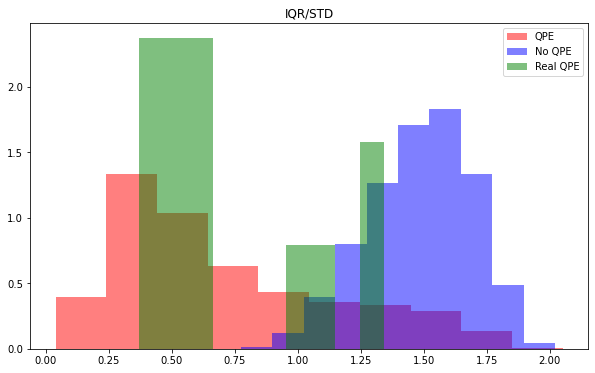

In [15]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f8,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f8,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realq_f8,density=True,alpha=0.5,label='Real QPE',color='g')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[7])
plt.show()

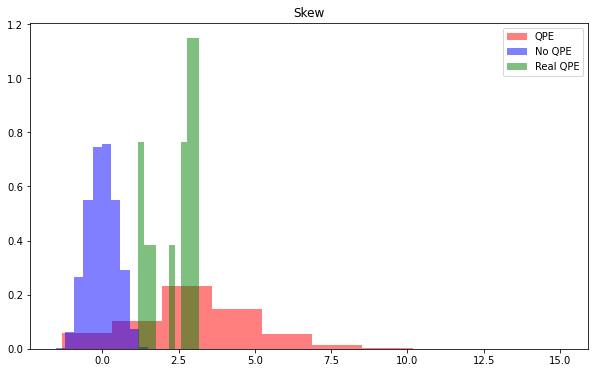

In [16]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f9,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f9,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realq_f9,density=True,alpha=0.5,label='Real QPE',color='g')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[8])
plt.show()

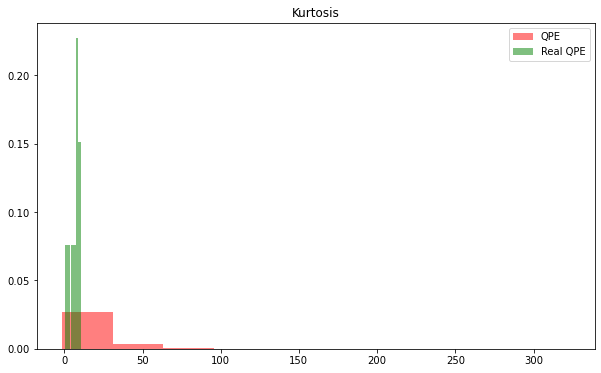

In [17]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f10,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(realq_f10,density=True,alpha=0.5,label='Real QPE',color='g')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[9])
plt.show()

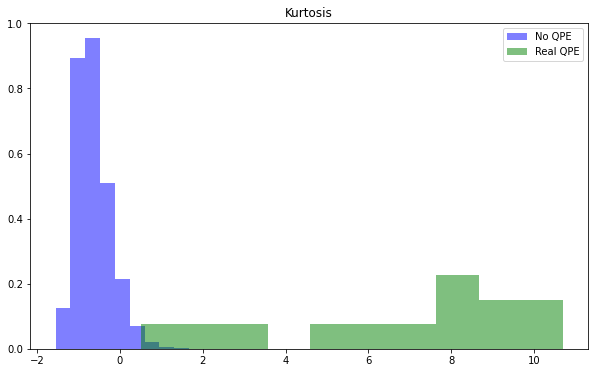

In [18]:
plt.subplots(figsize=(10,6))
plt.hist(nqpe_f10,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realq_f10,density=True,alpha=0.5,label='Real QPE',color='g')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[9])
plt.show()

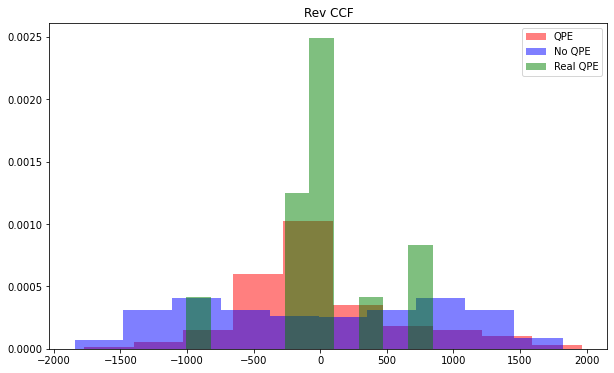

In [19]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f11,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f11,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realq_f11,density=True,alpha=0.5,label='Real QPE',color='g')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[10])
plt.show()

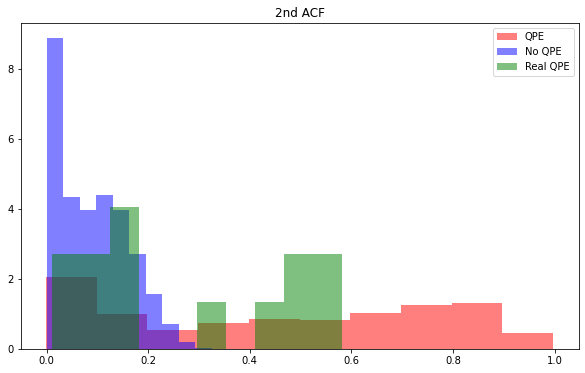

In [20]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f12,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f12,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realq_f12,density=True,alpha=0.5,label='Real QPE',color='g')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[11])
plt.show()

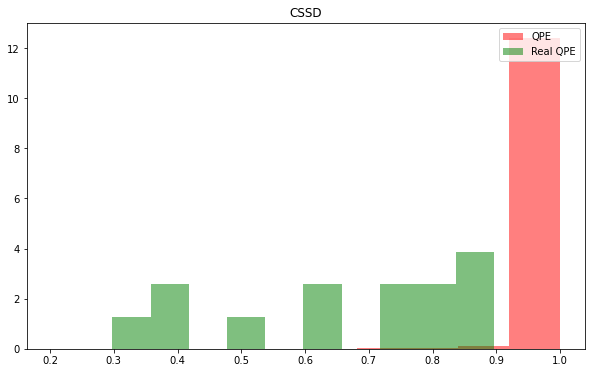

In [21]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f13,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(realq_f13,density=True,alpha=0.5,label='Real QPE',color='g')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[12])
plt.show()

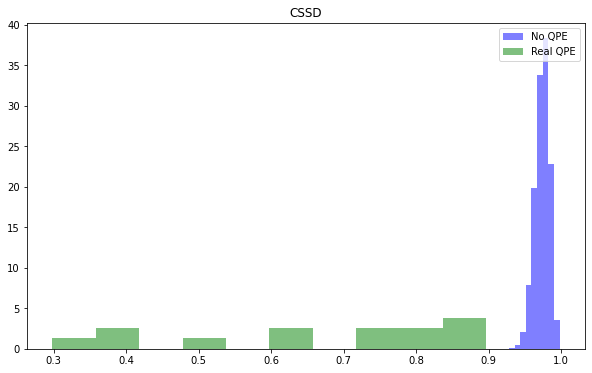

In [22]:
plt.subplots(figsize=(10,6))
plt.hist(nqpe_f13,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realq_f13,density=True,alpha=0.5,label='Real QPE',color='g')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[12])
plt.show()

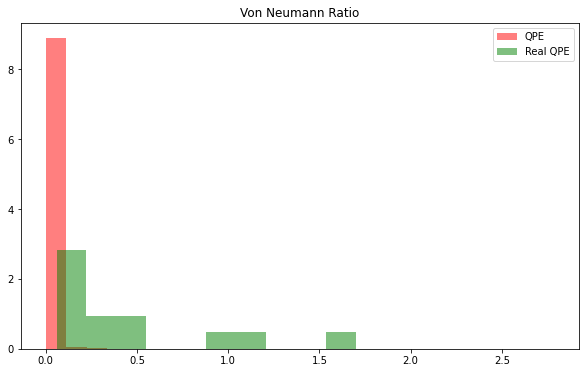

In [23]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f14,bins=25,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(realq_f14,density=True,alpha=0.5,label='Real QPE',color='g')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[13])
plt.show()

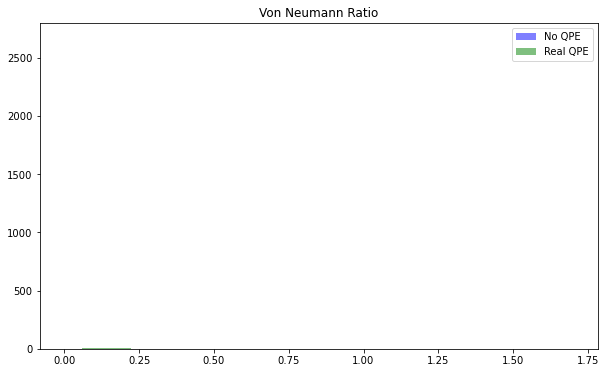

In [24]:
plt.subplots(figsize=(10,6))
plt.hist(nqpe_f14,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realq_f14,density=True,alpha=0.5,label='Real QPE',color='g')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[13])
plt.show()

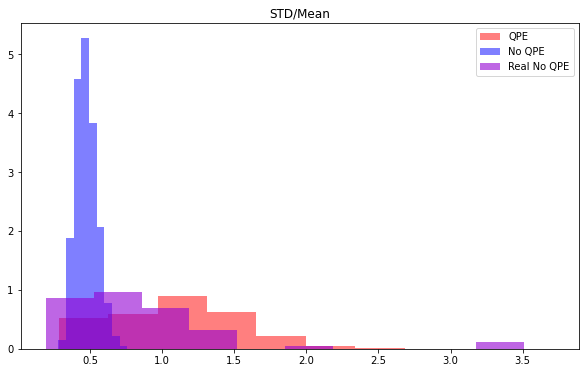

In [25]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f1,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f1,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realn_f1,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[0])
plt.show()

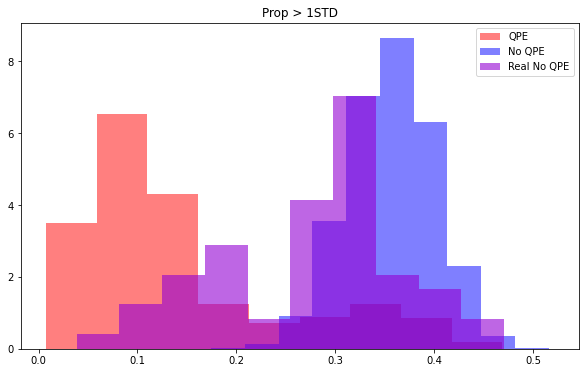

In [26]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f2,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f2,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realn_f2,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[1])
plt.show()

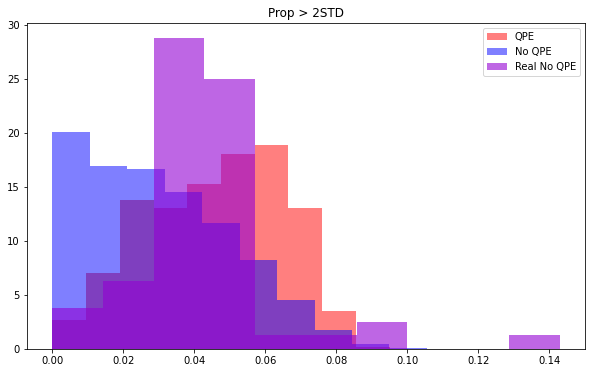

In [27]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f3,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f3,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realn_f3,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[2])
plt.show()

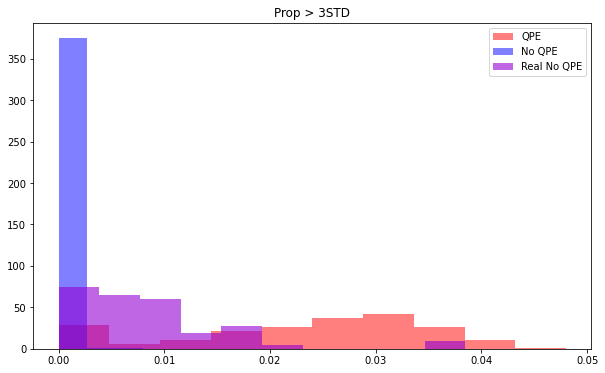

In [28]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f4,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f4,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realn_f4,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[3])
plt.show()

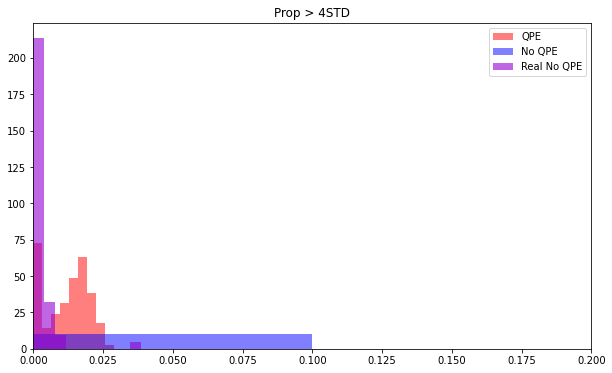

In [29]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f5,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f5,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realn_f5,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.xlim(0,0.2)
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[4])
plt.show()

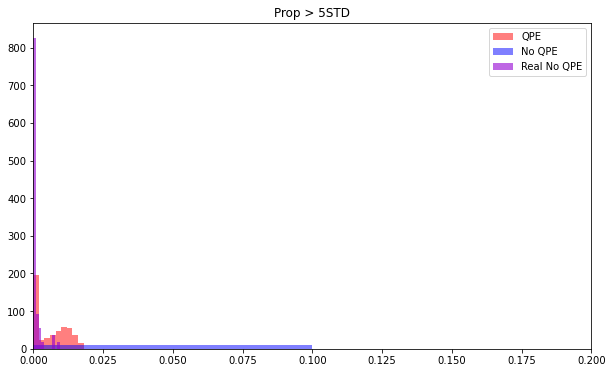

In [30]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f6,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f6,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realn_f6,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.xlim(0,0.2)
plt.title(qpe_df.columns.values[5])
plt.show()

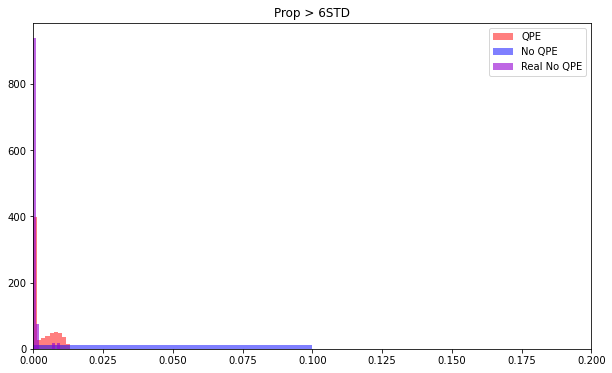

In [31]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f7,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f7,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realn_f7,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[6])
plt.xlim(0,0.2)
plt.show()

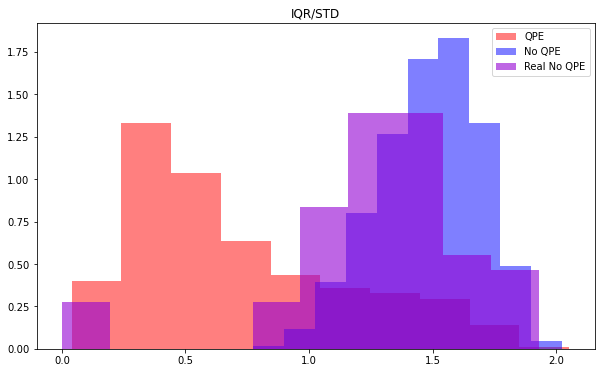

In [32]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f8,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f8,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realn_f8,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[7])
plt.show()

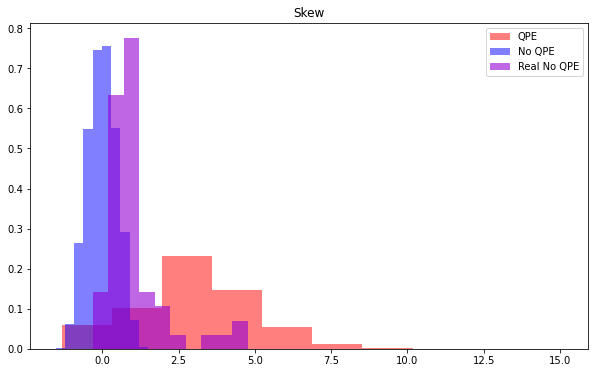

In [33]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f9,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f9,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realn_f9,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[8])
plt.show()

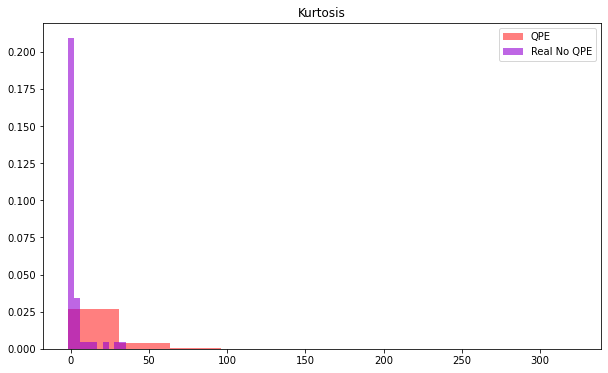

In [34]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f10,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(realn_f10,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[9])
plt.show()

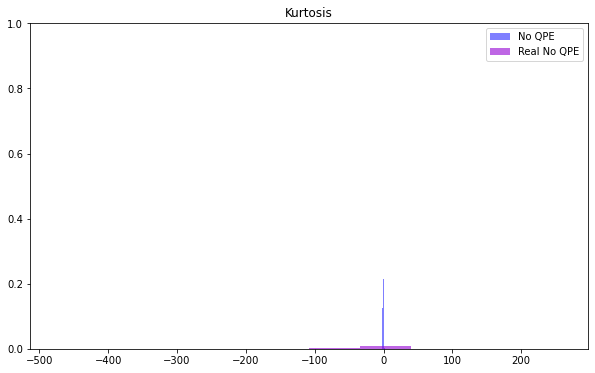

In [35]:
plt.subplots(figsize=(10,6))
plt.hist(nqpe_f10,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realn_f11,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[9])
plt.show()

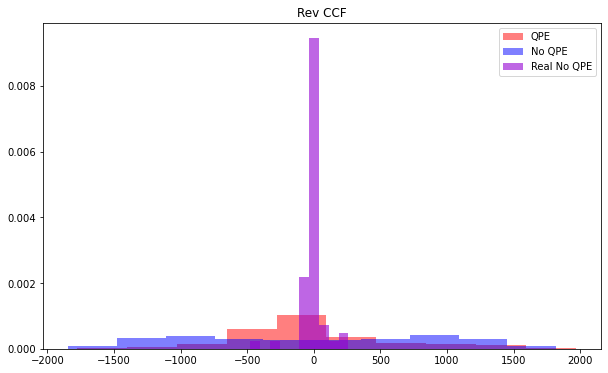

In [36]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f11,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f11,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realn_f11,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[10])
plt.show()

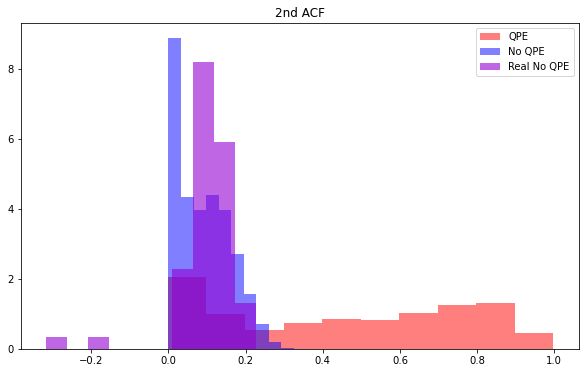

In [37]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f12,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(nqpe_f12,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realn_f12,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[11])
plt.show()

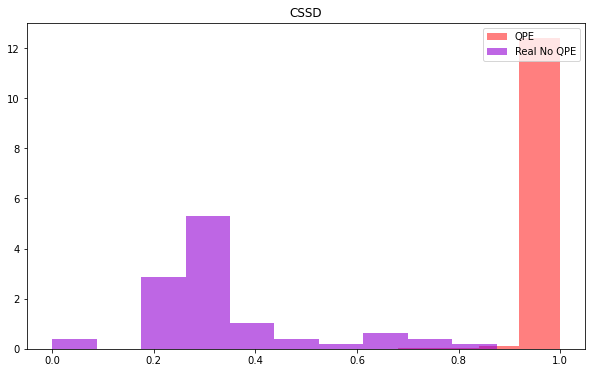

In [38]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f13,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(realn_f13,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[12])
plt.show()

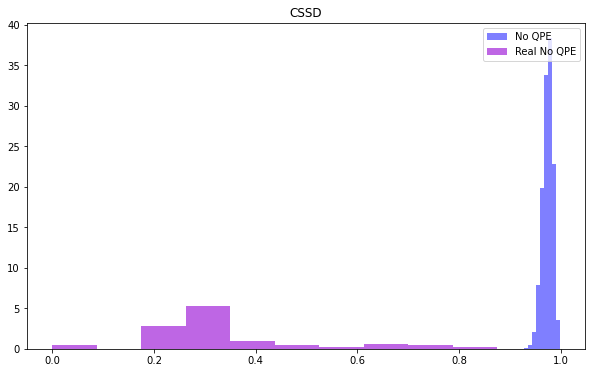

In [39]:
plt.subplots(figsize=(10,6))
plt.hist(nqpe_f13,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realn_f13,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[12])
plt.show()

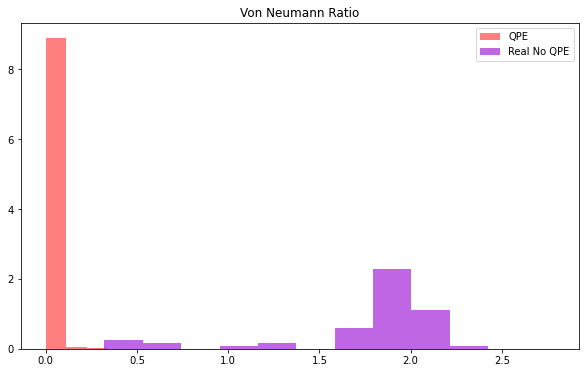

In [40]:
plt.subplots(figsize=(10,6))
plt.hist(qpe_f14,bins=25,density=True,alpha=0.5,label='QPE',color='r')
plt.hist(realn_f14,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[13])
plt.show()

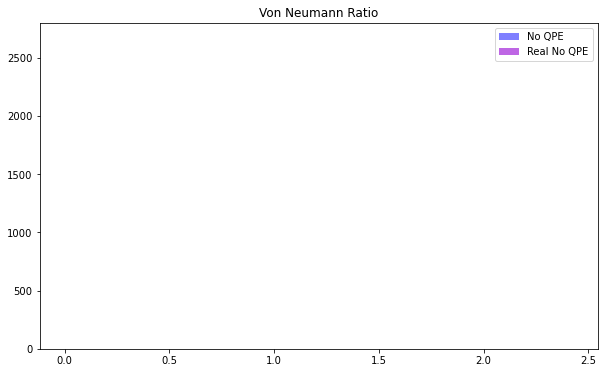

In [41]:
plt.subplots(figsize=(10,6))
plt.hist(nqpe_f14,density=True,alpha=0.5,label='No QPE',color='b')
plt.hist(realn_f14,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[13])
plt.show()

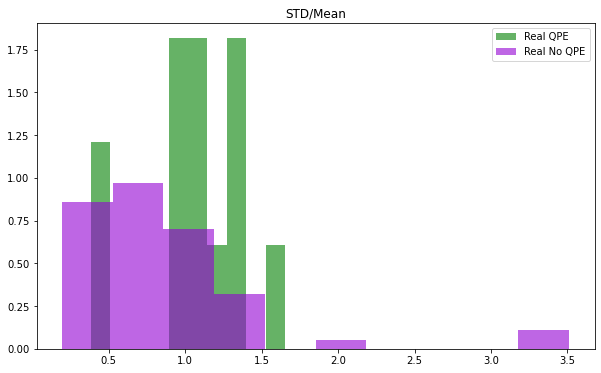

In [42]:
plt.subplots(figsize=(10,6))
plt.hist(realq_f1,density=True,alpha=0.6,label='Real QPE',color='g')
plt.hist(realn_f1,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[0])
plt.show()

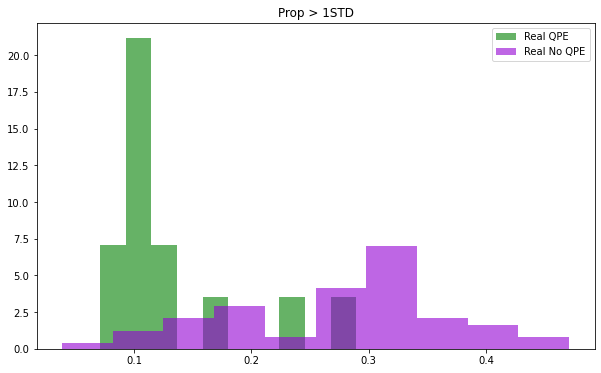

In [43]:
plt.subplots(figsize=(10,6))
plt.hist(realq_f2,density=True,alpha=0.6,label='Real QPE',color='g')
plt.hist(realn_f2,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[1])
plt.show()

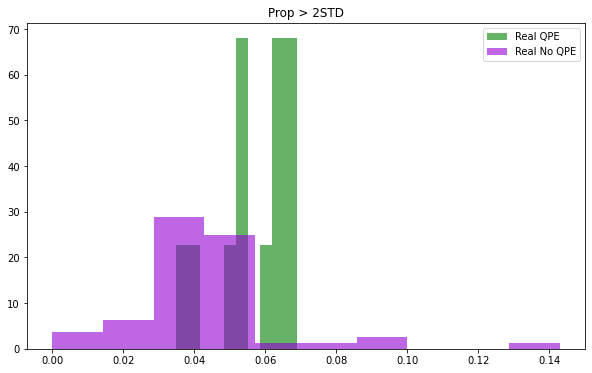

In [44]:
plt.subplots(figsize=(10,6))
plt.hist(realq_f3,density=True,alpha=0.6,label='Real QPE',color='g')
plt.hist(realn_f3,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[2])
plt.show()

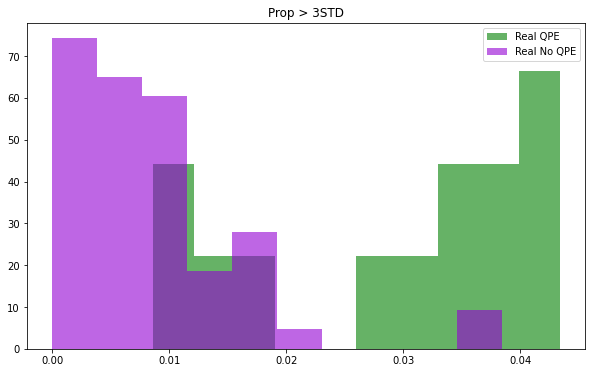

In [45]:
plt.subplots(figsize=(10,6))
plt.hist(realq_f4,density=True,alpha=0.6,label='Real QPE',color='g')
plt.hist(realn_f4,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[3])
plt.show()

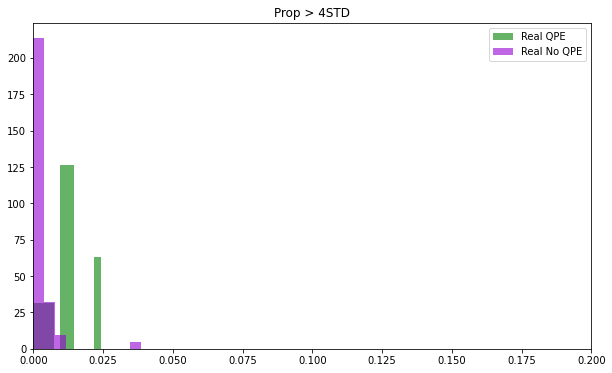

In [46]:
plt.subplots(figsize=(10,6))
plt.hist(realq_f5,density=True,alpha=0.6,label='Real QPE',color='g')
plt.hist(realn_f5,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.xlim(0,0.2)
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[4])
plt.show()

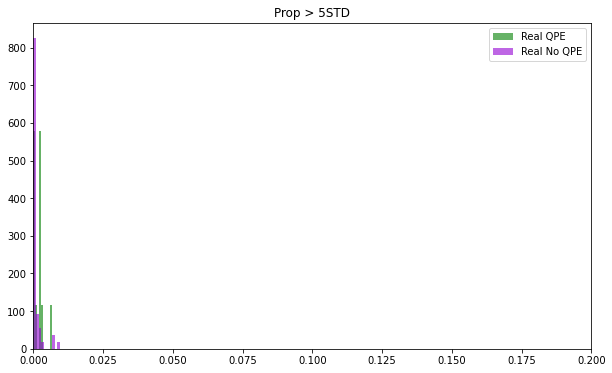

In [47]:
plt.subplots(figsize=(10,6))
plt.hist(realq_f6,density=True,alpha=0.6,label='Real QPE',color='g')
plt.hist(realn_f6,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.xlim(0,0.2)
plt.title(qpe_df.columns.values[5])
plt.show()

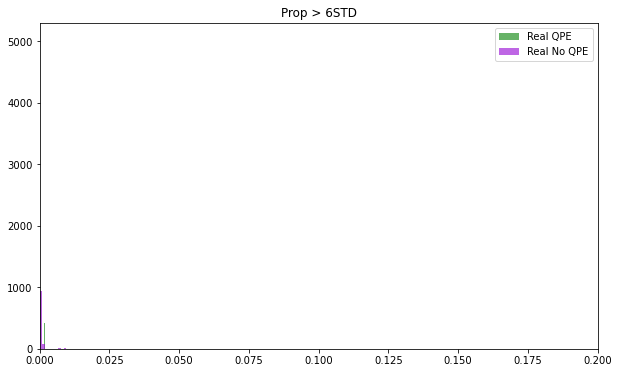

In [48]:
plt.subplots(figsize=(10,6))
plt.hist(realq_f7,density=True,alpha=0.6,label='Real QPE',color='g')
plt.hist(realn_f7,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[6])
plt.xlim(0,0.2)
plt.show()

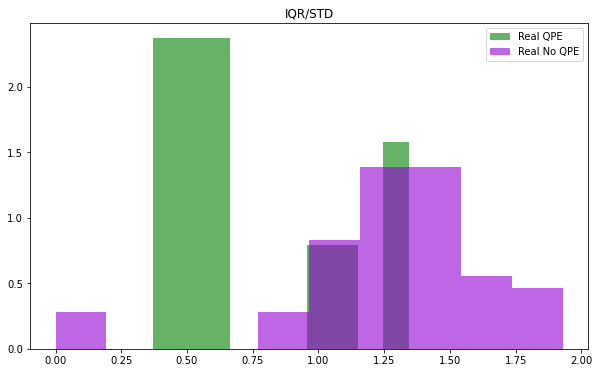

In [49]:
plt.subplots(figsize=(10,6))
plt.hist(realq_f8,density=True,alpha=0.6,label='Real QPE',color='g')
plt.hist(realn_f8,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[7])
plt.show()

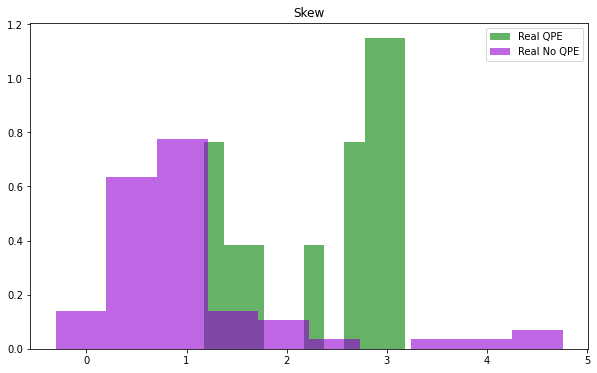

In [50]:
plt.subplots(figsize=(10,6))
plt.hist(realq_f9,density=True,alpha=0.6,label='Real QPE',color='g')
plt.hist(realn_f9,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[8])
plt.show()

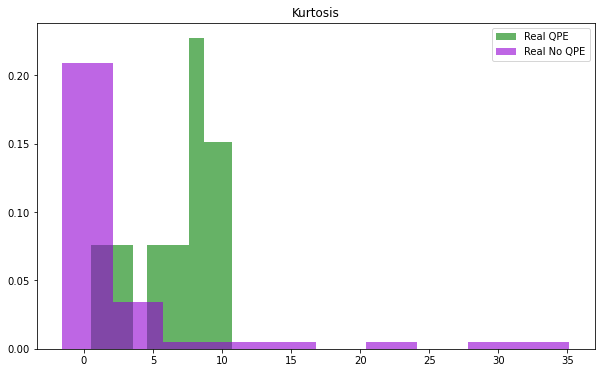

In [51]:
plt.subplots(figsize=(10,6))
plt.hist(realq_f10,density=True,alpha=0.6,label='Real QPE',color='g')
plt.hist(realn_f10,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[9])
plt.show()

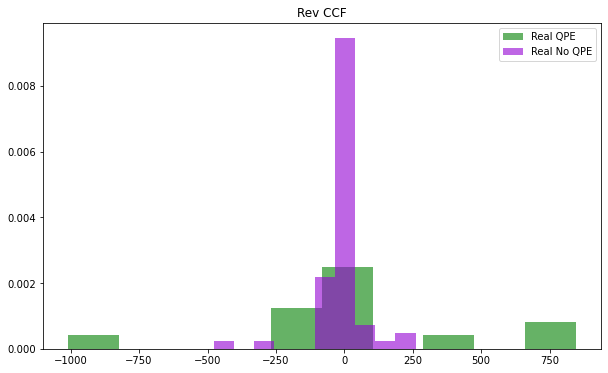

In [52]:
plt.subplots(figsize=(10,6))
plt.hist(realq_f11,density=True,alpha=0.6,label='Real QPE',color='g')
plt.hist(realn_f11,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[10])
plt.show()

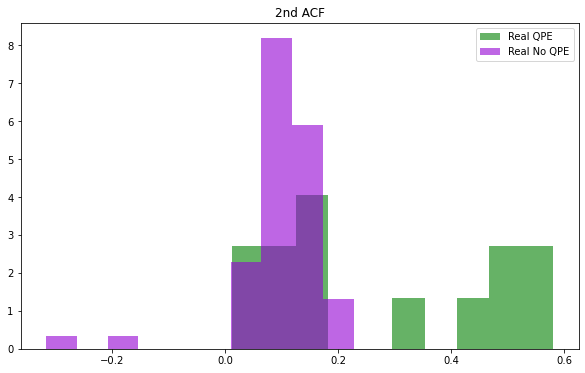

In [53]:
plt.subplots(figsize=(10,6))
plt.hist(realq_f12,density=True,alpha=0.6,label='Real QPE',color='g')
plt.hist(realn_f12,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[11])
plt.show()

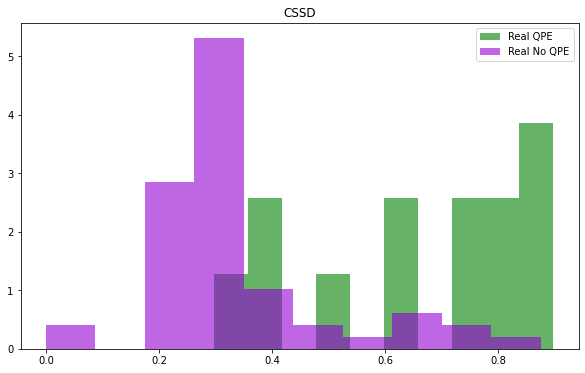

In [54]:
plt.subplots(figsize=(10,6))
plt.hist(realq_f13,density=True,alpha=0.6,label='Real QPE',color='g')
plt.hist(realn_f13,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[12])
plt.show()

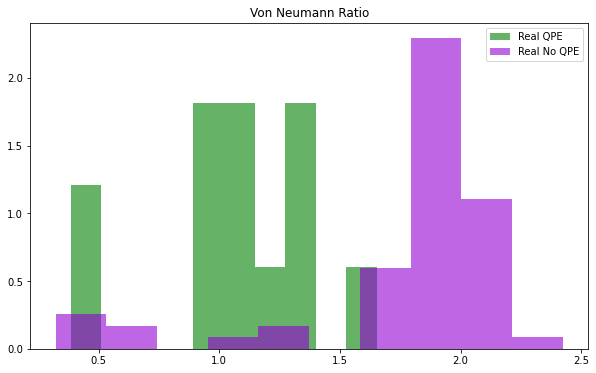

In [55]:
plt.subplots(figsize=(10,6))
plt.hist(realq_f1,density=True,alpha=0.6,label='Real QPE',color='g')
plt.hist(realn_f14,density=True,alpha=0.6,label='Real No QPE',color='darkviolet')
plt.legend(loc='upper right')
plt.title(qpe_df.columns.values[13])
plt.show()